In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

## linear regression Basics 

$$\hat{y} = wx + b$$

## Gredient Descent 

$$w = w - \alpha \frac{\partial}{\partial w}$$ 
$$w = b - \alpha \frac{\partial}{\partial b}$$

where $\alpha$ is the learning rate

## Cost Function

$$J(w,b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))^2$$

## Partial Derivatives

$$\frac{\partial}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))(-x_i)$$
$$\frac{\partial}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))(-1)$$


## Update Rule

$$w = w - \alpha \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))(-x_i)$$
$$b = b - \alpha \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))(-1)$$

## Gradient Descent Algorithm

1. Initialize the weights $w$ and $b$ with random values
2. Calculate the predicted values $\hat{y} = wx + b$
3. Compute the cost function $J(w,b)$
4. Compute the partial derivatives $\frac{\partial}{\partial w}$ and $\frac{\partial}{\partial b}$
5. Update the weights $w$ and $b$ using the update rule
6. Repeat steps 2-5 until the cost function converges to a minimum

# working of below code 

$$\hat{y} = w[i.....n] *x[i.....n] + b$$










In [11]:
class LinearRegression:

    def __init__(self, lr = 0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

        print (self.weights, self.bias)
        
        

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred 
    
  

        

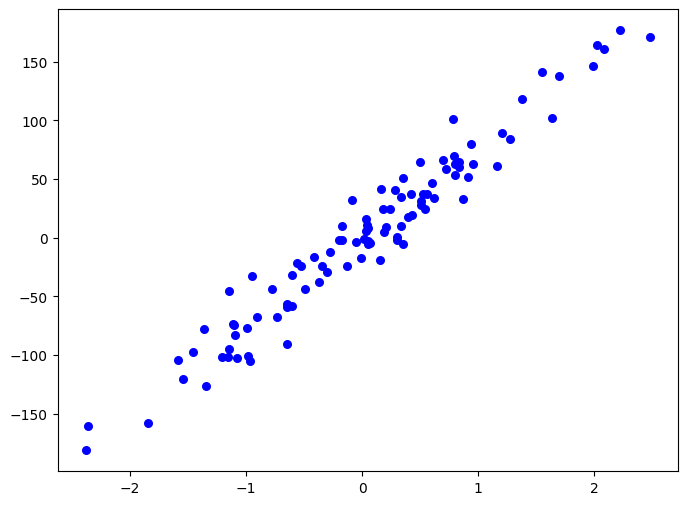

305.77413159354944


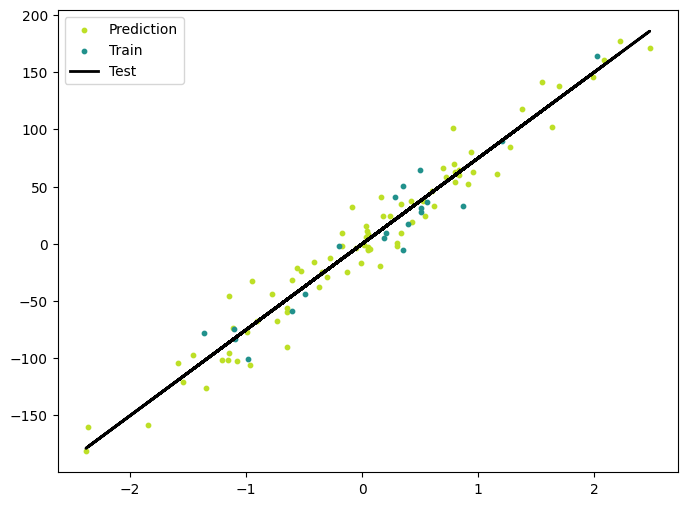

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 


x,y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(x[:,0],y,color="b",marker="o",s=30)

plt.show()

reg= LinearRegression(lr=0.0195)
reg.fit(x_train,y_train)
predicted = reg.predict(x_test)

def mse(y_test,y_pred):
    return np.mean((y_test-y_pred)**2)

print (mse(y_test,predicted))

y_pred_line = reg.predict(x)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(x_train,y_train,color=cmap(0.9),s=10)
m2 = plt.scatter(x_test,y_test,color=cmap(0.5),s=10)
plt.plot(x,y_pred_line,color="black",linewidth=2,label="Prediction")
plt.legend(["Prediction","Train","Test"],loc="upper left")

plt.show()





